**1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Boosting in Machine Learning is an ensemble technique that combines multiple weak learners (models that perform slightly better than random guessing, like shallow decision trees) to create a strong learner that achieves high accuracy.

**2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

AdaBoost trains each model by reweighting misclassified samples, while Gradient Boosting trains each model to correct the residual errors of the previous models using gradient descent.

**3: How does regularization help in XGBoost?**

Regularization in XGBoost helps prevent overfitting by penalizing complex trees through L1 (Lasso) and L2 (Ridge) terms in the objective function.

**4: Why is CatBoost considered efficient for handling categorical data?**

CatBoost is efficient for categorical data because it uses target-based encoding with ordered statistics, avoiding overfitting and manual preprocessing.

**5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Boosting techniques are preferred in credit scoring, fraud detection, customer churn prediction, medical diagnosis, and click-through rate prediction — where high accuracy and handling of complex patterns are crucial.

** 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model **


Data Preprocessing:

Handle missing numeric values using median or model-based (RandomForest/Iterative) imputation.

Encode categoricals: use CatBoost’s native handling or target encoding (for XGBoost).

Treat imbalance with class weights or balanced boosting variants.

Perform EDA for outliers, skewness, and feature correlations before modeling.

Model Choice:

Prefer CatBoost (best for mixed data).

Use XGBoost if more tuning control needed; AdaBoost for baseline comparison.

Hyperparameter Tuning:

Use Random/Bayesian search with cross-validation and early stopping.

Tune key params: learning_rate, n_estimators, max_depth, subsample, colsample_bytree, and regularization.

Evaluation Metrics:

Primary: PR-AUC or Recall (handles imbalance).

Secondary: ROC-AUC, F1/F2-score, and Precision@K for top-risk targeting.

Check calibration for probability-based risk scoring.

Business Benefit:

Enables accurate default prediction, loss reduction, risk-based pricing, and regulatory explainability using SHAP insights.




In [1]:
'''6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9707602339181286


In [2]:
'''7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score'''

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.7803012822391022


In [4]:
'''8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy'''

from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'learning_rate': 0.05}
Accuracy: 0.9649122807017544


In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


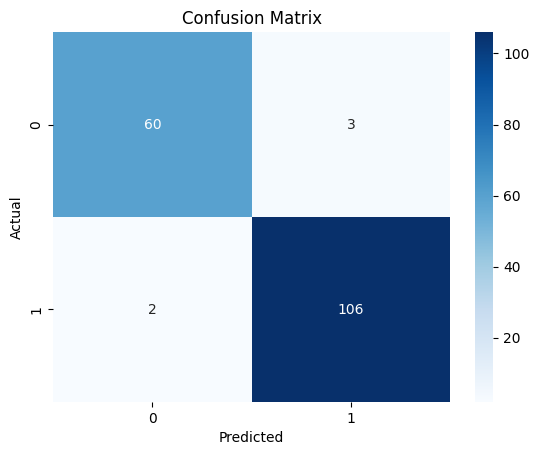

In [7]:
'''9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn'''

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
